In [0]:
# !dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns

import datadotworld as dw

sns.set()

In [0]:
# drive.mount('/content/drive')

In [8]:
HOME = '/content/drive/My Drive/Colab Notebooks/matrix/dataworkshop_matrix'
%cd {HOME}

/content/drive/My Drive/Colab Notebooks/matrix/dataworkshop_matrix


In [0]:
%mkdir data

In [0]:
!echo 'data' > .gitignore
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [15]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [16]:
df.head()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,true,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,false,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:5

In [17]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [18]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [19]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
new                                                       3
UnbeatableSale.com, Inc. - Walmart.com                    3
New with box                                              3
PalmBeach Jewelry - Walmart.com                           3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
New without tags                                          1
Name: prices_currency, dtype: int64

In [21]:
df_usd = df[ df.prices_currency == 'USD'].copy()
df_usd.head()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,true,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,false,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:5

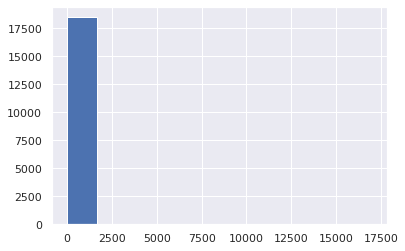

In [26]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [32]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
filter_max

895.0

In [0]:
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max]

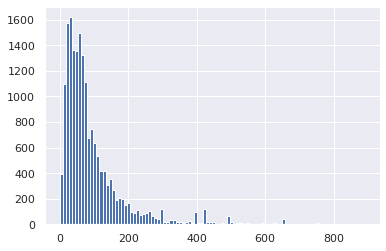

In [34]:
df_usd_filter['prices_amountmin'].hist(bins=100)

In [35]:
%ls

data/  day_3.ipynb  hello_github.ipynb  LICENSE  README.md


In [0]:
!git add day_3.ipynb
!git config --global user.email "mzalecki.ignis@gmail.com"
!git config --global user.name "Marek Zalecki"
!git p